In [45]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras
import os

In [46]:
path = '../datasets/B101/'
files = os.listdir(path)
files = [file for file in files if file.endswith('_trimmed.mat')]

In [47]:
dataSet = {}
for file in files:
    fileName = os.path.basename(file)
    fileName = fileName.split('.')[0]
    fileName = fileName.removeprefix('Channel')
    fileName = fileName.removesuffix('_trimmed')
    dataSet[fileName] = sio.loadmat(path + file)

In [48]:
dataSet['1']['trimmedMatrix'][0]

array([-21702628. ,  -8657071. ,   7671702. , ...,   8025217. ,
         5740304. ,   5312691.5], dtype=float32)

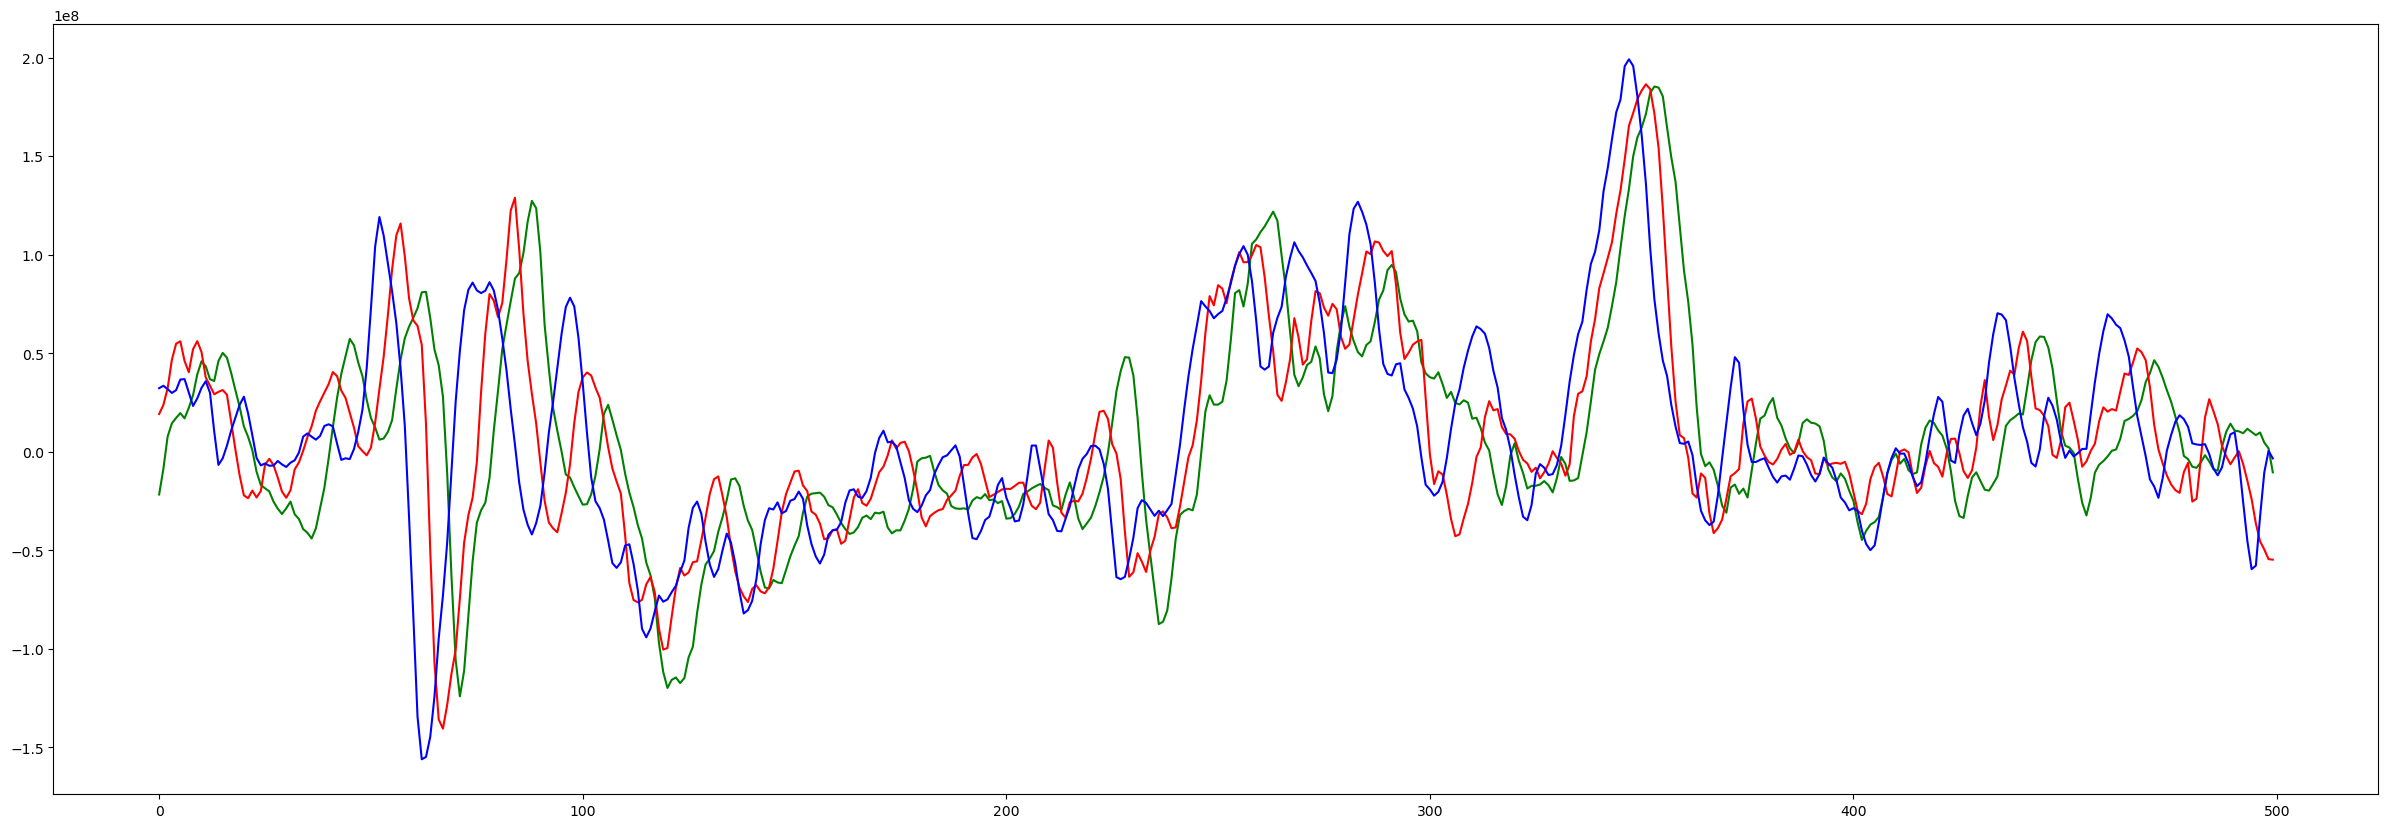

In [49]:
#Plot the first channel
plt.figure(figsize=(30,10))
plt.plot(dataSet['1']['trimmedMatrix'][0][:500], 'g')
plt.plot(dataSet['2']['trimmedMatrix'][0][:500], 'r')
plt.plot(dataSet['3']['trimmedMatrix'][0][:500], 'b')
#plt.plot(dataSet['4']['trimmedMatrix'][0][:500], 'c')
#plt.plot(dataSet['39']['trimmedMatrix'][0][:500],'y')
plt.show()

In [50]:
for delta1 in range(10):
    delta2 = delta1*2
    #calculate correlation between 3 channels
    corr1 = np.corrcoef(dataSet['3']['trimmedMatrix'][0][0:500], dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)])
    corr2 = np.corrcoef(dataSet['3']['trimmedMatrix'][0][0:500], dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)])
    corr3 = np.corrcoef(dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)], dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)])
    print(f'delta1: {delta1}, delta2: {delta2}, corr1: {corr1[0][1]}, corr2: {corr2[0][1]}, corr3: {corr3[0][1]}')

delta1: 0, delta2: 0, corr1: 0.702687663405326, corr2: 0.44364425776154753, corr3: 0.7209454248050877
delta1: 1, delta2: 2, corr1: 0.7871549316953549, corr2: 0.5548641787846039, corr3: 0.7958573524209768
delta1: 2, delta2: 4, corr1: 0.8610582657119328, corr2: 0.687419717355068, corr3: 0.8591363569257903
delta1: 3, delta2: 6, corr1: 0.915014861299738, corr2: 0.8089759488247671, corr3: 0.9075574836380935
delta1: 4, delta2: 8, corr1: 0.9397091202492958, corr2: 0.8714847071432374, corr3: 0.9356322553885539
delta1: 5, delta2: 10, corr1: 0.9294880222569267, corr2: 0.8417106397052276, corr3: 0.9362400109636264
delta1: 6, delta2: 12, corr1: 0.8853092957822244, corr2: 0.7224175888370693, corr3: 0.9062157857991711
delta1: 7, delta2: 14, corr1: 0.8162690302035607, corr2: 0.5651894363375316, corr3: 0.8487772948902904
delta1: 8, delta2: 16, corr1: 0.7335938800940852, corr2: 0.40906763084783454, corr3: 0.7749299352848739
delta1: 9, delta2: 18, corr1: 0.6468502847397155, corr2: 0.26151565682459516, c

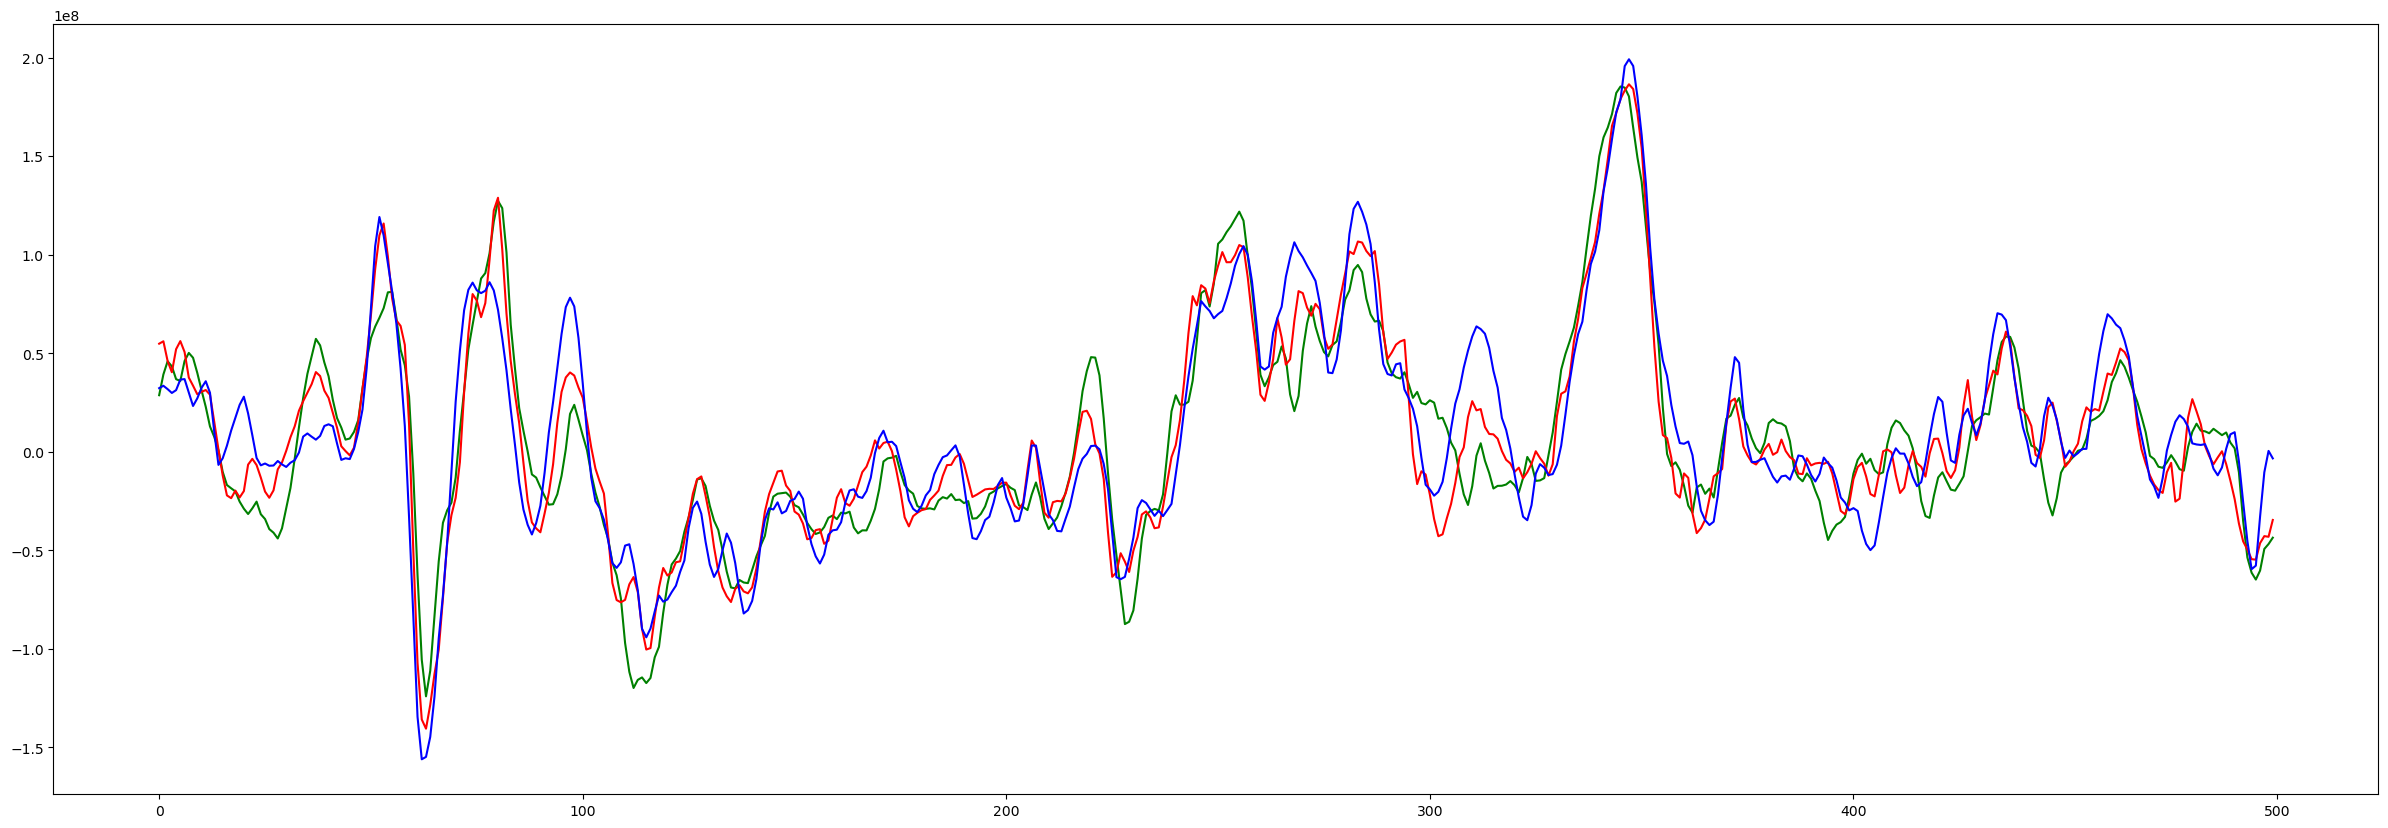

In [51]:
delta1 = 4
delta2 = delta1*2
plt.figure(figsize=(30,10))
plt.plot(dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)], 'g')
plt.plot(dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)], 'r')
plt.plot(dataSet['3']['trimmedMatrix'][0][0:500], 'b')
plt.show()

In [52]:
#Convert dataset to a DataFrame
sample_number = list(range(1, len(dataSet['1']['trimmedMatrix'][0]) +1 ))
len(sample_number)

5000

In [53]:
data = {i: dataSet[str(i)]['trimmedMatrix'][0] for i in range(1, len(dataSet) + 1)}
data['Sample Number'] = sample_number

In [54]:
df = pd.DataFrame(data)
df.columns = df.columns.astype(str)
df['Sample Number'] = df['Sample Number'].astype(str)
#save to csv
df.to_csv('../datasets/B101.csv', index=False)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,Sample Number
0,-21702628.0,19138048.0,32236258.0,51244964.0,74935888.0,38147144.0,-13074408.0,-2.392719e+07,24889856.0,11112823.0,...,-50892312.00,9.414751e+05,33705592.0,56559848.0,59520252.0,-69739672.0,27221122.00,47410772.0,-0.405964,1
1,-8657071.0,23700574.0,33458352.0,51465880.0,69407528.0,8547067.0,-18248194.0,-2.616152e+07,22502146.0,9870442.0,...,-49899500.00,2.462671e+06,30771782.0,57463768.0,58843692.0,-56539596.0,19007986.00,38041716.0,-0.406930,2
2,7671702.0,32182680.0,31744626.0,45216160.0,46552552.0,-9296116.0,-22513750.0,-2.303438e+07,19045490.0,10353620.0,...,-39279436.00,2.544912e+06,27229150.0,73049032.0,54722172.0,-49696160.0,12319030.00,31963860.0,-0.407358,3
3,14368814.0,46593160.0,29802546.0,40133720.0,14989651.0,-15288238.0,-23866952.0,-1.551399e+07,24808912.0,13422054.0,...,-20367814.00,1.186586e+06,35922160.0,83836344.0,61153520.0,-58193308.0,-3076597.25,30483532.0,-0.408070,4
4,17132264.0,54802796.0,31241174.0,32190932.0,-3967872.5,-13540188.0,-21952628.0,-7.110207e+05,26568972.0,10426512.0,...,-3966653.25,6.488196e+06,38192264.0,82705704.0,67396488.0,-58142688.0,-5924850.00,31567262.0,-0.407797,5


In [55]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
oldDf = df
df = df.drop(columns=['Sample Number'])
scaler.fit(df)
df_normalized = scaler.transform(df)
df_normalized = pd.DataFrame(df_normalized)
#df_normalized.columns = oldDf.columns[:-1]
#df_normalized['Sample Number'] = oldDf['Sample Number']
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.343506,0.495484,0.560506,0.593987,0.652193,0.611686,0.475617,0.405261,0.510899,0.507554,...,0.559021,0.303001,0.399617,0.474893,0.703070,0.572981,0.169792,0.593924,0.692173,0.335301
1,0.384883,0.509245,0.563725,0.594606,0.638058,0.543977,0.463403,0.399808,0.504572,0.504014,...,0.546415,0.305707,0.403830,0.467366,0.705522,0.571390,0.211438,0.562110,0.651969,0.334909
2,0.436673,0.534827,0.559211,0.577097,0.579622,0.503161,0.453333,0.407440,0.495414,0.505391,...,0.554496,0.334657,0.404058,0.458277,0.747806,0.561696,0.233029,0.536200,0.625887,0.334736
3,0.457914,0.578290,0.554096,0.562859,0.498920,0.489454,0.450138,0.425794,0.510684,0.514133,...,0.597097,0.386208,0.400296,0.480580,0.777073,0.576822,0.206221,0.476564,0.619535,0.334447
4,0.466679,0.603051,0.557885,0.540608,0.450449,0.493453,0.454657,0.461921,0.515348,0.505599,...,0.611740,0.430917,0.414980,0.486404,0.774005,0.591506,0.206381,0.465531,0.624186,0.334558


In [56]:
#Split the data into training and testing
train_size = 4500
train = df_normalized.iloc[:train_size, :]
test = df_normalized.iloc[train_size:, :]
train.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.343506,0.495484,0.560506,0.593987,0.652193,0.611686,0.475617,0.405261,0.510899,0.507554,...,0.559021,0.303001,0.399617,0.474893,0.703070,0.572981,0.169792,0.593924,0.692173,0.335301
1,0.384883,0.509245,0.563725,0.594606,0.638058,0.543977,0.463403,0.399808,0.504572,0.504014,...,0.546415,0.305707,0.403830,0.467366,0.705522,0.571390,0.211438,0.562110,0.651969,0.334909
2,0.436673,0.534827,0.559211,0.577097,0.579622,0.503161,0.453333,0.407440,0.495414,0.505391,...,0.554496,0.334657,0.404058,0.458277,0.747806,0.561696,0.233029,0.536200,0.625887,0.334736
3,0.457914,0.578290,0.554096,0.562859,0.498920,0.489454,0.450138,0.425794,0.510684,0.514133,...,0.597097,0.386208,0.400296,0.480580,0.777073,0.576822,0.206221,0.476564,0.619535,0.334447
4,0.466679,0.603051,0.557885,0.540608,0.450449,0.493453,0.454657,0.461921,0.515348,0.505599,...,0.611740,0.430917,0.414980,0.486404,0.774005,0.591506,0.206381,0.465531,0.624186,0.334558


In [57]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
4500,0.505878,0.565413,0.502780,0.448180,0.457756,0.506813,0.557919,0.564675,0.603316,0.730595,...,0.514650,0.288873,0.391293,0.270210,0.574332,0.461673,0.306346,0.448165,0.615276,0.339181
4501,0.528955,0.558655,0.484785,0.463481,0.474961,0.502511,0.579093,0.573558,0.641821,0.741880,...,0.495071,0.329410,0.407923,0.288024,0.609729,0.468002,0.237926,0.476015,0.638006,0.337971
4502,0.515979,0.550541,0.473947,0.468122,0.460274,0.542234,0.605989,0.590518,0.675351,0.747831,...,0.484678,0.384448,0.445245,0.291723,0.591488,0.441553,0.186754,0.516376,0.662742,0.337178
4503,0.511591,0.517026,0.475764,0.497144,0.442732,0.564547,0.628215,0.608420,0.691887,0.755059,...,0.498925,0.418706,0.456377,0.308420,0.520644,0.406672,0.199674,0.467934,0.670546,0.336881
4504,0.524641,0.484187,0.486974,0.494628,0.435819,0.578014,0.647393,0.634044,0.702673,0.741732,...,0.507570,0.428346,0.422093,0.327660,0.496285,0.397664,0.226037,0.434933,0.659870,0.336324


In [58]:
#Multivariate time series forecasting with LSTMs
model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(62))
model.compile(optimizer='adam', loss='mse')

In [59]:
#Prepare the data
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [60]:
n_steps = 10
X_train, y_train = prepare_data(train.values, n_steps)
X_test, y_test = prepare_data(test.values, n_steps)

In [61]:
#Ogni finestra è di 1 n_steps campioni. Ci sono train_size-n_steps finestre. Ogni finestra ha n_steps snapshot di input e ogni input è fatto da 62 canali.
X_train.shape, y_train.shape

((4490, 10, 62), (4490, 62))

In [62]:
#Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [63]:
#Evaluate the model
model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013


0.00118756084702909

In [64]:
#Make predictions
predictions = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [65]:
X_test.shape

(490, 10, 62)

In [66]:
y_test.shape

(490, 62)

In [67]:
predictions.shape

(490, 62)

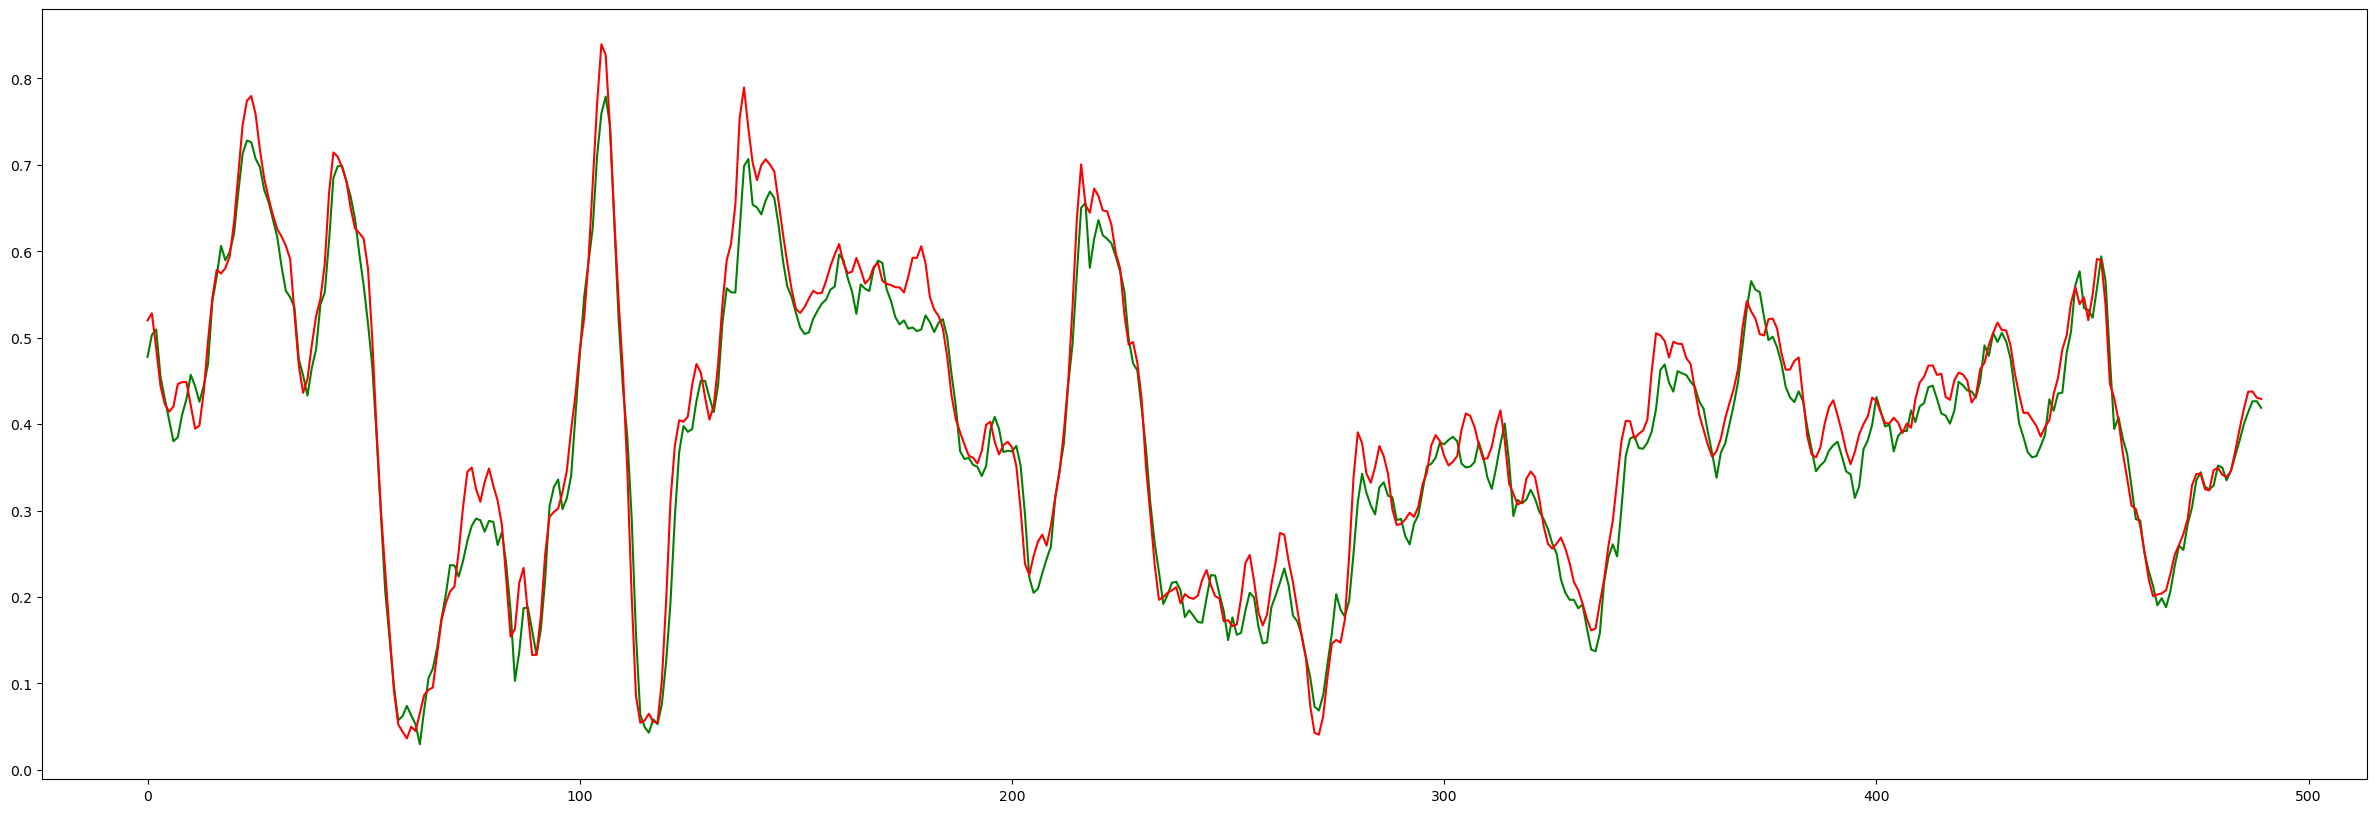

In [68]:
#Plot the predictions
plt.figure(figsize=(30,10))
plt.plot(predictions[:,0], 'g')
plt.plot(y_test[:,0], 'r')
plt.show()

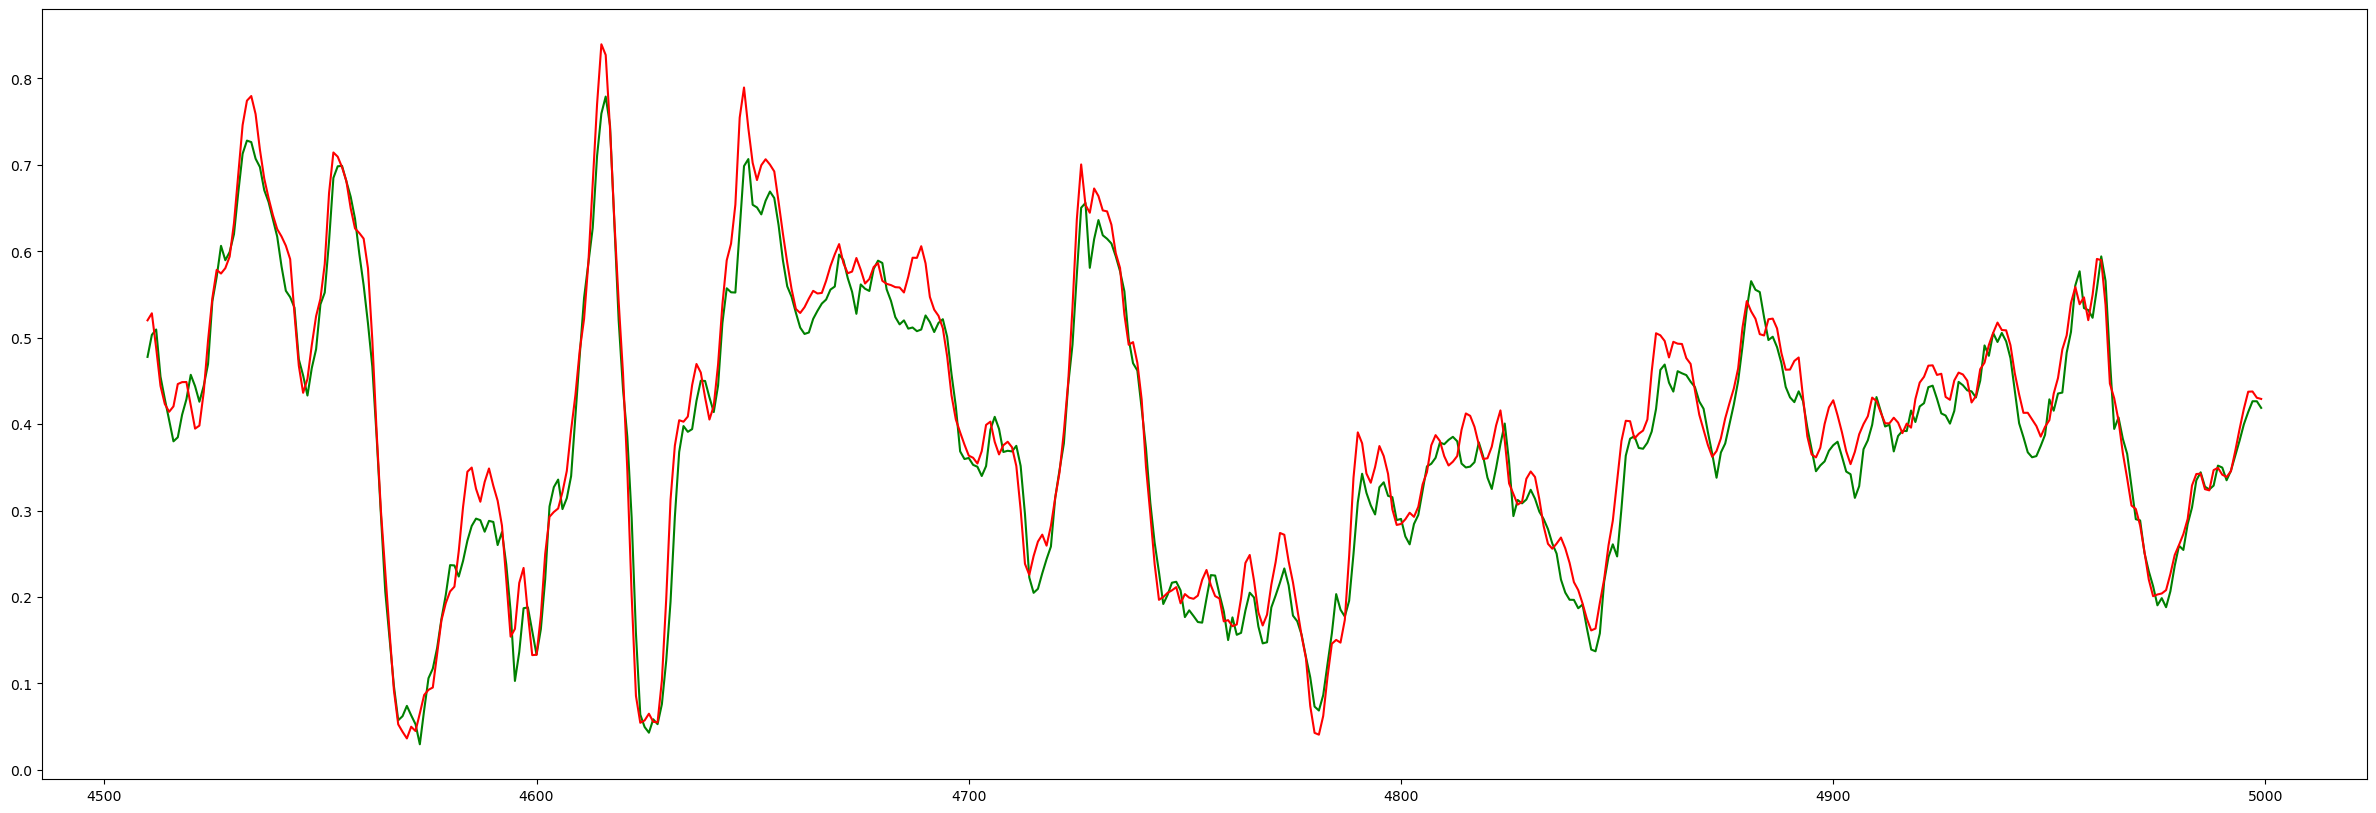

In [100]:
channel1Prediction = predictions[:,0]

# Create a new x-axis array starting from 4500
shift = n_steps+train_size
x_values = np.arange(shift, shift + len(channel1Prediction))

plt.figure(figsize=(30,10))
plt.plot(x_values, channel1Prediction, 'g')
plt.plot(df_normalized[0][shift:], 'r')
plt.show()